In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv("C:\Dinesh\Downloads\letters\A_Z Handwritten Data.csv").astype('float32')

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [5]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [6]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}


In [7]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)

In [8]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [9]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))



model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history = model.fit(train_X, train_yOHE, epochs=5, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))

Epoch 1/5
9312/9312 [==============================] - 395s 42ms/step - loss: 0.1591 - accuracy: 0.9565 - val_loss: 0.0900 - val_accuracy: 0.9757
Epoch 2/5
9312/9312 [==============================] - 413s 44ms/step - loss: 0.0808 - accuracy: 0.9787 - val_loss: 0.0804 - val_accuracy: 0.9799
Epoch 3/5
9312/9312 [==============================] - 362s 39ms/step - loss: 0.0699 - accuracy: 0.9821 - val_loss: 0.0667 - val_accuracy: 0.9836
Epoch 4/5
9312/9312 [==============================] - 362s 39ms/step - loss: 0.0633 - accuracy: 0.9843 - val_loss: 0.0743 - val_accuracy: 0.9834
Epoch 5/5
9312/9312 [==============================] - 383s 41ms/step - loss: 0.0283 - accuracy: 0.9926 - val_loss: 0.0379 - val_accuracy: 0.9914


In [13]:
model.save("C:\\Dinesh\\Downloads\\letters\\model_hand1.h5")

In [14]:
scores = model.evaluate(test_X,test_yOHE, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.41%


In [17]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9740636348724365]
The training accuracy is : [0.9569405317306519]
The validation loss is : [0.09667330980300903]
The training loss is : [0.15732398629188538]


In [10]:
from keras.models import load_model
model = load_model("C:\\Dinesh\\Downloads\\letters\\model_hand1.h5")

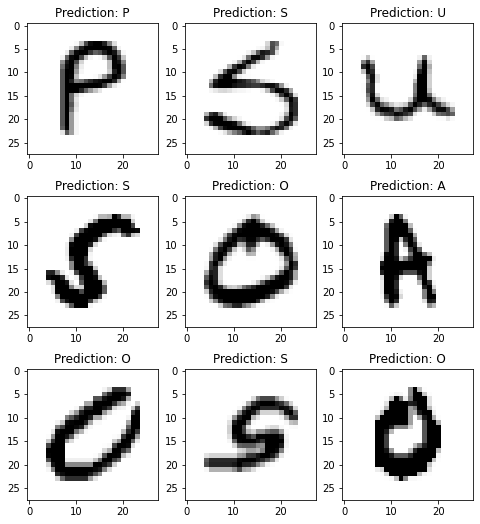

In [13]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)